In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv("./Resources/user_profiles_for_ads.csv")
df.head()


,User ID,Age,Gender,Location,Language,Education Level,Likes and Reactions,Followed Accounts,Device Usage,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec),Income Level,Top Interests
0,1,25-34,Female,Suburban,Hindi,Technical,5640,190,Mobile Only,4.5,1.7,0.193,0.067,25,20k-40k,Digital Marketing
1,2,65+,Male,Urban,Hindi,PhD,9501,375,Tablet,0.5,7.7,0.114,0.044,68,0-20k,Data Science
2,3,45-54,Female,Suburban,Spanish,Technical,4775,187,Mobile Only,4.5,5.6,0.153,0.095,80,60k-80k,Fitness and Wellness
3,4,35-44,Female,Rural,Spanish,PhD,9182,152,Desktop Only,3.1,4.2,0.093,0.061,65,100k+,"Gaming, DIY Crafts"
4,5,25-34,Female,Urban,English,Technical,6848,371,Mobile Only,2.0,3.8,0.175,0.022,99,20k-40k,"Fitness and Wellness, Investing and Finance, G..."


### Here’s an overview of all the columns in the dataset:

* User ID: Unique identifier for each user.
* Age: Age range of the user.
* Gender: Gender of the user.
* Location: User’s location type (Urban, Suburban, Rural).
* Language: Primary language of the user.
* Education Level: Highest education level achieved.
* Likes and Reactions: Number of likes and reactions a user has made.
* Followed Accounts: Number of accounts a user follows.
* Device Usage: Primary device used for accessing the platform (Mobile, Desktop, Tablet).
* Time Spent Online (hrs/weekday): Average hours spent online on weekdays.
* Time Spent Online (hrs/weekend): Average hours spent online on weekends.
* Click-Through Rates (CTR): The percentage of ad impressions that lead to clicks.
* Conversion Rates: The percentage of clicks that lead to conversions/actions.
Ad Interaction Time (sec): Average time spent interacting with ads in seconds.
* Income Level: User’s income level.
* Top Interests: Primary interests of the user.

In [3]:
df.isnull().sum()

User ID                            0
Age                                0
Gender                             0
Location                           0
Language                           0
Education Level                    0
Likes and Reactions                0
Followed Accounts                  0
Device Usage                       0
Time Spent Online (hrs/weekday)    0
Time Spent Online (hrs/weekend)    0
Click-Through Rates (CTR)          0
Conversion Rates                   0
Ad Interaction Time (sec)          0
Income Level                       0
Top Interests                      0
dtype: int64

## Exploratory Data Analysis

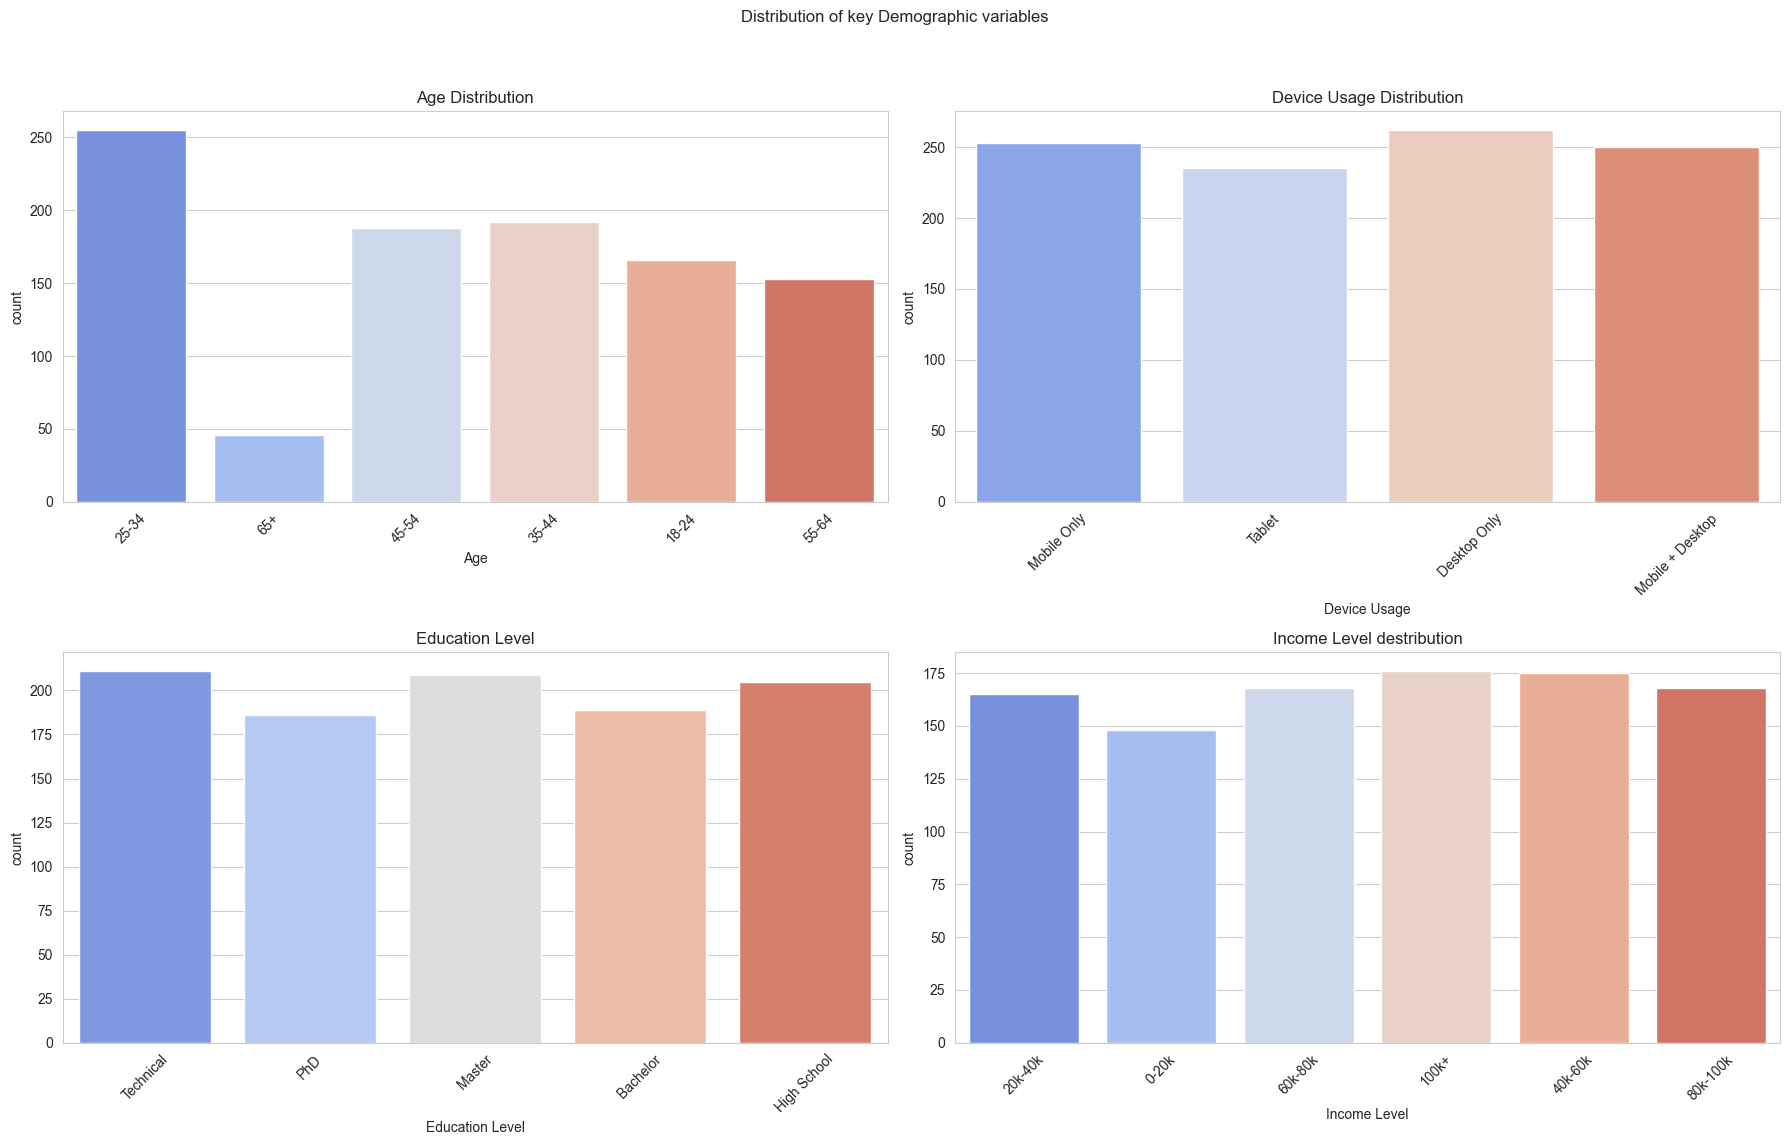

In [4]:
# setting the style for plots
sns.set_style('whitegrid')

# creating subplots for the demographic distributions
fig, ax = plt.subplots(2, 2, figsize=(18,12))
fig.suptitle("Distribution of key Demographic variables")

# age distribution
sns.countplot(ax=ax[0,0], x='Age', data=df, palette='coolwarm')
ax[0,0].set_title('Age Distribution')
ax[0,0].tick_params(axis='x', rotation = 45)

# Device Usage distribution
sns.countplot(ax=ax[0,1], x='Device Usage', data=df, palette='coolwarm')
ax[0,1].set_title('Device Usage Distribution')
ax[0,1].tick_params(axis='x', rotation = 45)

# education level distribution
sns.countplot(ax=ax[1,0], x='Education Level', data=df, palette='coolwarm')
ax[1,0].set_title('Education Level')
ax[1,0].tick_params(axis='x', rotation = 45)

# income level distribution
sns.countplot(ax=ax[1,1], x='Income Level', data=df, palette='coolwarm')
ax[1,1].set_title('Income Level destribution')
ax[1,1].tick_params(axis='x', rotation = 45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

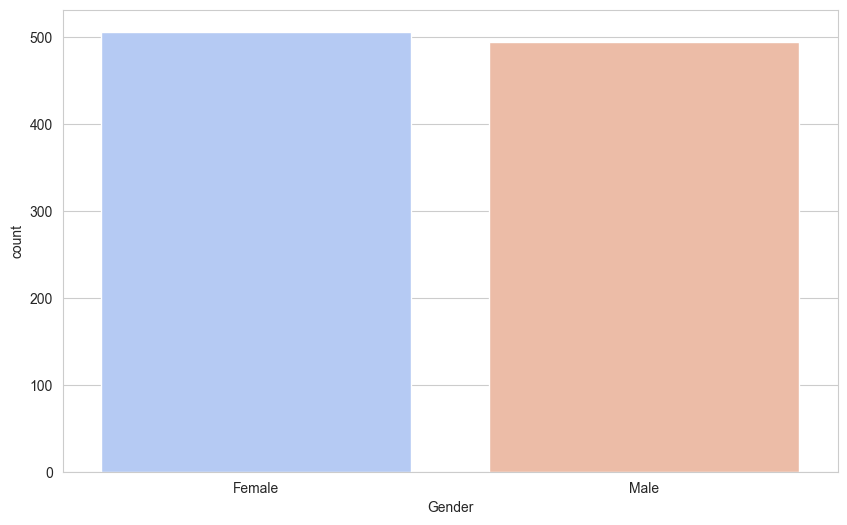

In [5]:
# Gender distribution
plt.figure(figsize=(10,6))
sns.countplot(x='Gender', data=df, palette='coolwarm')
plt.show()

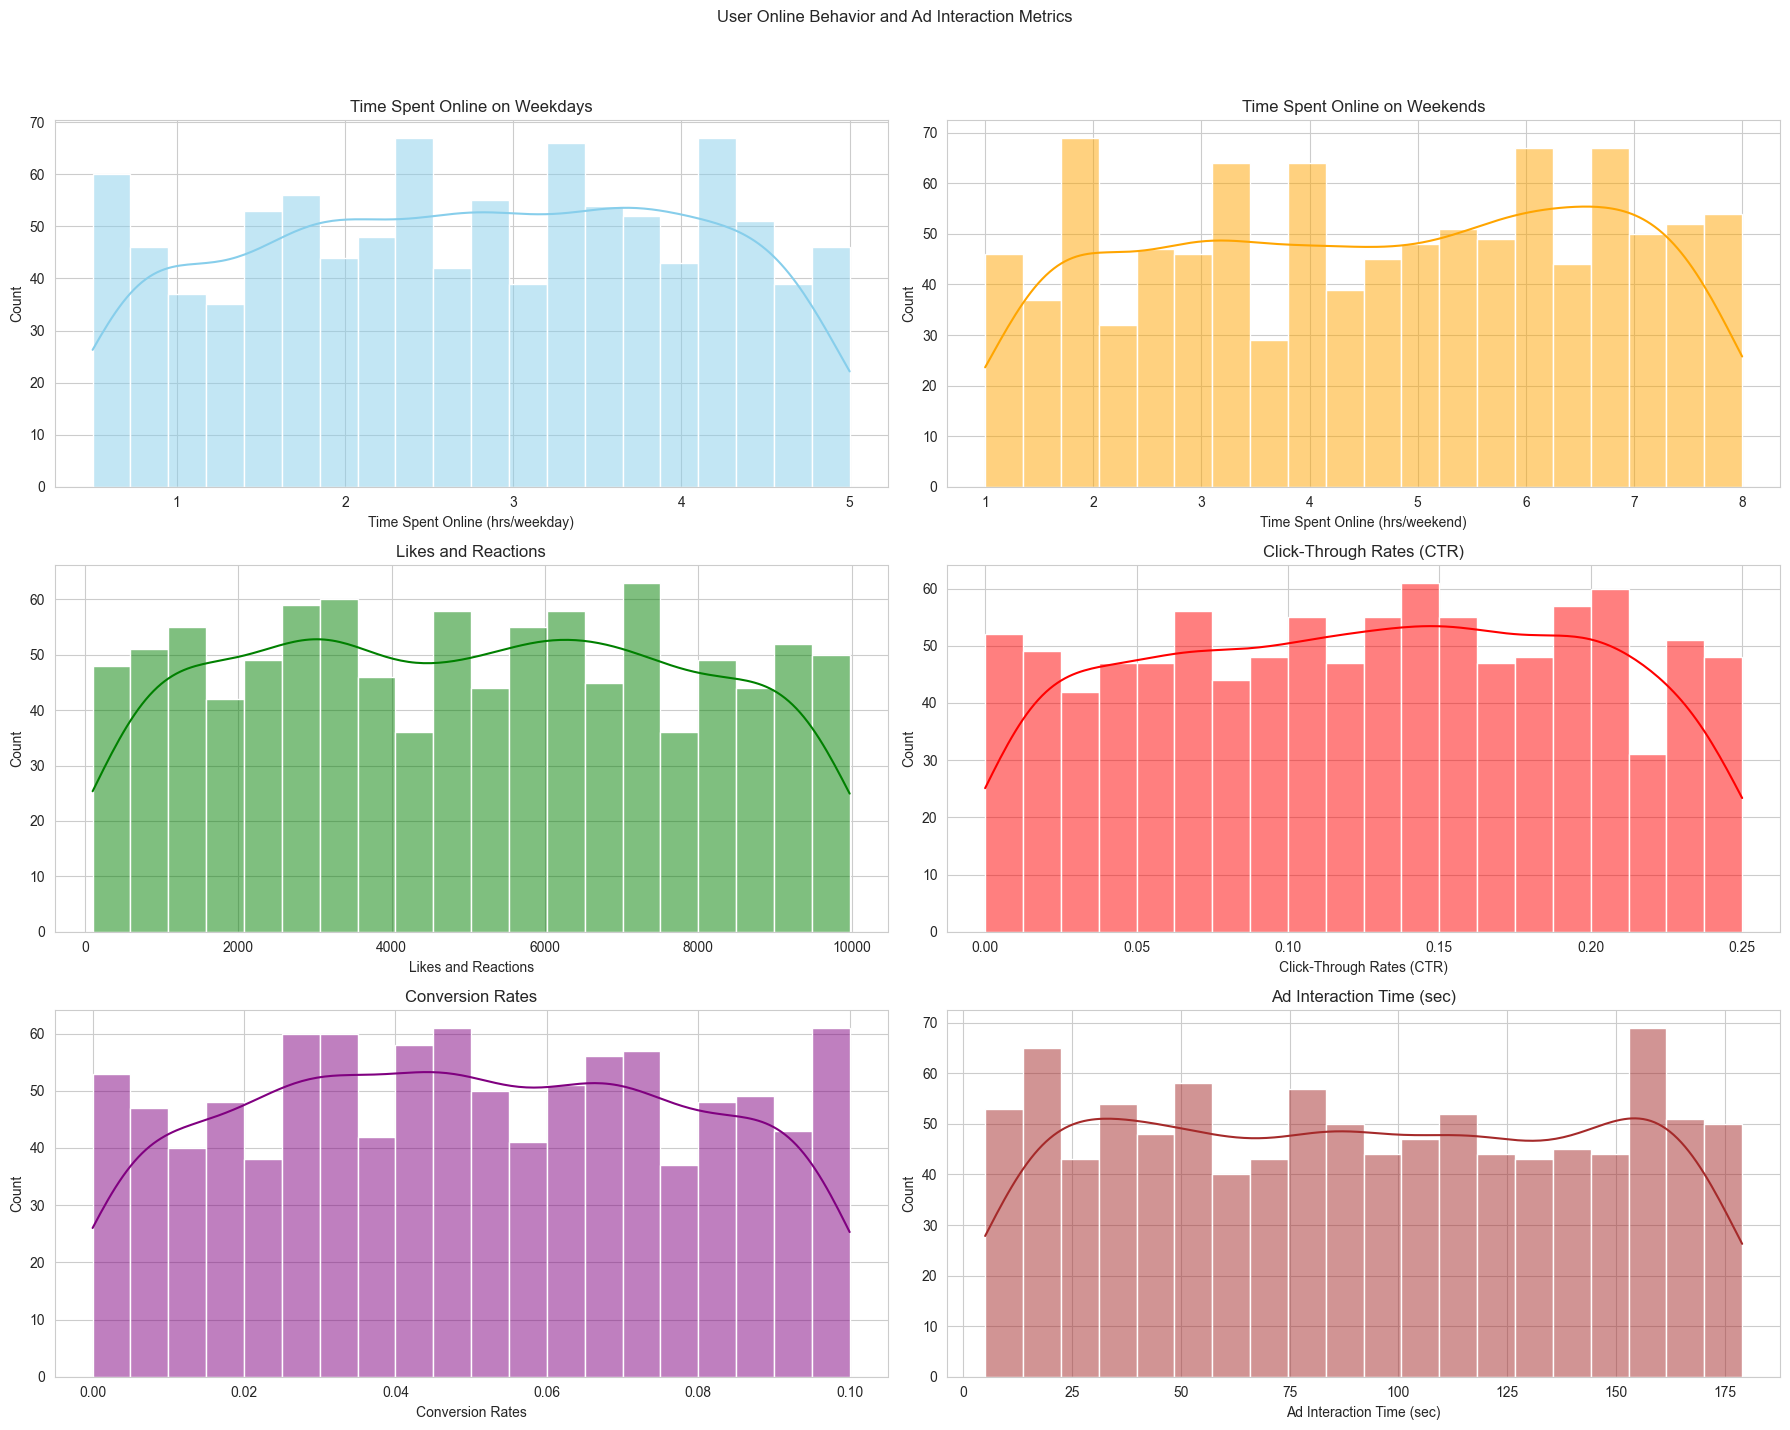

In [6]:
# creating subplots for user online behavior and ad interaction metrics
fig, ax = plt.subplots(3, 2, figsize=(18, 15))
fig.suptitle('User Online Behavior and Ad Interaction Metrics')

# time spent online on weekdays
sns.histplot(ax=ax[0, 0], x='Time Spent Online (hrs/weekday)', data=df, bins=20, kde=True, color='skyblue')
ax[0, 0].set_title('Time Spent Online on Weekdays')

# time spent online on weekends
sns.histplot(ax=ax[0, 1], x='Time Spent Online (hrs/weekend)', data=df, bins=20, kde=True, color='orange')
ax[0, 1].set_title('Time Spent Online on Weekends')

# likes and reactions
sns.histplot(ax=ax[1, 0], x='Likes and Reactions', data=df, bins=20, kde=True, color='green')
ax[1, 0].set_title('Likes and Reactions')

# click-through rates
sns.histplot(ax=ax[1, 1], x='Click-Through Rates (CTR)', data=df, bins=20, kde=True, color='red')
ax[1, 1].set_title('Click-Through Rates (CTR)')

# conversion rates
sns.histplot(ax=ax[2, 0], x='Conversion Rates', data=df, bins=20, kde=True, color='purple')
ax[2, 0].set_title('Conversion Rates')

# ad interaction time
sns.histplot(ax=ax[2, 1], x='Ad Interaction Time (sec)', data=df, bins=20, kde=True, color='brown')
ax[2, 1].set_title('Ad Interaction Time (sec)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

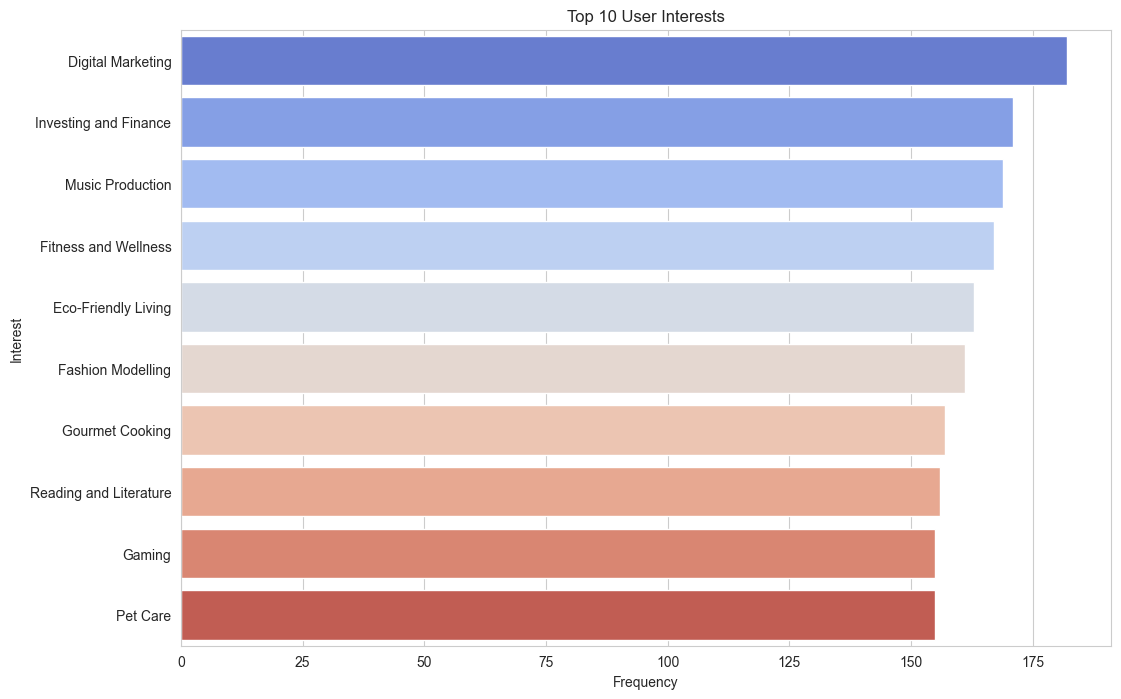

In [7]:
from collections import Counter

# splitting the 'Top Interests' column and creating a list of all interests
interests_list = df['Top Interests'].str.split(', ').sum()

# counting the frequency of each interest
interests_counter = Counter(interests_list)

# converting the counter object to a DataFrame for easier plotting
interests_df = pd.DataFrame(interests_counter.items(), columns=['Interest', 'Frequency']).sort_values(by='Frequency', ascending=False)

# plotting the most common interests
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Interest', data=interests_df.head(10), palette='coolwarm')
plt.title('Top 10 User Interests')
plt.xlabel('Frequency')
plt.ylabel('Interest')
plt.show()

## User Profiling and Segmentation

We can now segment users into distinct groups for targeted ad campaigns. Segmentation can be based on various criteria, such as:

* Demographics: Age, Gender, Income Level, Education Level
* Behavioural: Time Spent Online, Likes and Reactions, CTR, Conversion Rates
* Interests: Aligning ad content with the top interests identified

In [9]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

# selecting features for clustering
features = ['Age', 'Gender', 'Income Level', 'Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)', 'Likes and Reactions', 'Click-Through Rates (CTR)']

# separating the features we want to consider for clustering
X = df[features]

# defining preprocessing for numerical and categorical features
numeric_features = ['Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)', 'Likes and Reactions', 'Click-Through Rates (CTR)']
numeric_transformer = StandardScaler()

categorical_features = ['Age', 'Gender', 'Income Level']
categorical_transformer = OneHotEncoder()

# combining preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# creating a preprocessing and clustering pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('cluster', KMeans(n_clusters=5, random_state=42))])

pipeline.fit(X)
cluster_labels = pipeline.named_steps['cluster'].labels_
df['Cluster'] = cluster_labels

df.head()

,User ID,Age,Gender,Location,Language,Education Level,Likes and Reactions,Followed Accounts,Device Usage,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec),Income Level,Top Interests,Cluster
0,1,25-34,Female,Suburban,Hindi,Technical,5640,190,Mobile Only,4.5,1.7,0.193,0.067,25,20k-40k,Digital Marketing,2
1,2,65+,Male,Urban,Hindi,PhD,9501,375,Tablet,0.5,7.7,0.114,0.044,68,0-20k,Data Science,1
2,3,45-54,Female,Suburban,Spanish,Technical,4775,187,Mobile Only,4.5,5.6,0.153,0.095,80,60k-80k,Fitness and Wellness,0
3,4,35-44,Female,Rural,Spanish,PhD,9182,152,Desktop Only,3.1,4.2,0.093,0.061,65,100k+,"Gaming, DIY Crafts",3
4,5,25-34,Female,Urban,English,Technical,6848,371,Mobile Only,2.0,3.8,0.175,0.022,99,20k-40k,"Fitness and Wellness, Investing and Finance, G...",2


In [11]:
# computing the mean values of numerical features for each cluster
cluster_means = df.groupby('Cluster')[numeric_features].mean()

for feature in categorical_features:
    mode_series = df.groupby('Cluster')[feature].agg(lambda x: x.mode()[0])
    cluster_means[feature] = mode_series

cluster_means

,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Likes and Reactions,Click-Through Rates (CTR),Age,Gender,Income Level
Cluster,,,,,,,
0,3.911111,5.212963,2409.620370,0.149588,25-34,Female,80k-100k
1,1.559394,6.002424,5005.121212,0.179836,35-44,Male,80k-100k
2,3.019737,2.584211,6861.587719,0.170614,25-34,Male,20k-40k
3,3.080882,5.774510,7457.602941,0.067971,25-34,Female,100k+
4,1.809626,3.839572,3021.219251,0.056594,45-54,Female,0-20k


we can summarize and name the segments as follows:

* Cluster 0 – “Weekend Warriors”: High weekend online activity, moderate likes and reactions, predominantly male, age group 25-34, income level 80k-100k.
* Cluster 1 – “Engaged Professionals”: Balanced online activity, high likes and reactions, predominantly male, age group 25-34, high income (100k+).
* Cluster 2 – “Low-Key Users”: Moderate to high weekend online activity, moderate likes and reactions, predominantly male, age group 25-34, income level 60k-80k, lower CTR.
* Cluster 3 – “Active Explorers”: High overall online activity, lower likes and reactions, predominantly female, age group 25-34, income level 60k-80k.
* Cluster 4 – “Budget Browsers”: Moderate online activity, lowest likes and reactions, predominantly female, age group 25-34, lowest income level (0-20k), lower CTR.

In [15]:
import numpy as np

# preparing data for radar chart
features_to_plot = ['Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)', 'Likes and Reactions', 'Click-Through Rates (CTR)']
labels = np.array(features_to_plot)

# creating a dataframe for the radar chart
radar_df = cluster_means[features_to_plot].reset_index()

# normalizing the data
radar_df_normalized = radar_df.copy()
for feature in features_to_plot:
    radar_df_normalized[feature] = (radar_df[feature] - radar_df[feature].min()) / (radar_df[feature].max() - radar_df[feature].min())

# adding a full circle for plotting
radar_df_normalized = pd.concat([radar_df_normalized,pd.DataFrame(radar_df_normalized.iloc[0])])

# assigning names to segments
segment_names = ['Weekend Warriors', 'Engaged Professionals', 'Low-Key Users', 'Active Explorers', 'Budget Browsers']

In [18]:
import plotly.graph_objects as go
fig = go.Figure()

# loop through each segment to add to the radar chart
for i, segment in enumerate(segment_names):
    fig.add_trace(go.Scatterpolar(
        r=radar_df_normalized.iloc[i][features_to_plot].values.tolist() + [radar_df_normalized.iloc[i][features_to_plot].values[0]],  # Add the first value at the end to close the radar chart
        theta=labels.tolist() + [labels[0]],  # add the first label at the end to close the radar chart
        fill='toself',
        name=segment,
        hoverinfo='text',
        text=[f"{label}: {value:.2f}" for label, value in zip(features_to_plot, radar_df_normalized.iloc[i][features_to_plot])]+[f"{labels[0]}: {radar_df_normalized.iloc[i][features_to_plot][0]:.2f}"]  # Adding hover text for each feature
    ))

# update the layout to finalize the radar chart
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )),
    showlegend=True,
    title='User Profile Segments'
)

fig.show()